In [7]:
%reload_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import tensorly.random as tl_rand
import tensorly.kruskal_tensor as tl_kruskal
import numpy as np
from timeit import default_timer as timer
 
from BLOCK_SPG_CPD import bras_CPD
from BLOCK_SPG_CPD import ada_CPD

In [2]:
# Set up
# Generate random latent factors
rank = 100
F = tl_rand.random_kruskal((300,300,300), rank, full=False, random_state=np.random.RandomState(seed=0))
X = tl_kruskal.kruskal_to_tensor(F)
B = 18
b = 10**-6
eps = 0
eta = 1
num_iterations = 75000

In [ ]:
# Run bras_cpd update
alpha = 0.1
start = timer()
res_error, mse = bras_CPD(F, X, rank, B, alpha, beta, num_iterations)
end = timer()

In [29]:
# Run ada_CPD update
start = timer()
F = A
X = tl_kruskal.kruskal_to_tensor(F)
num_iterations = 25000
res_error, mse, A = ada_CPD(F, X, rank, B, eta, b, eps, num_iterations)
end = timer()

iteration: 4999
iteration: 9999
iteration: 14999
iteration: 19999
iteration: 24999


In [38]:
e = list(np.loadtxt("res_ada")) + res_error[1:]
m = list(np.loadtxt("mse_ada")) + mse[1:]

np.savetxt("res_ada.txt", e)
np.savetxt("mse_ada.txt", m)
np.savetxt("factorA_ada", A[0])
np.savetxt("factorB_ada", A[1])
np.savetxt("factorC_ada", A[2])

<Figure size 432x288 with 0 Axes>

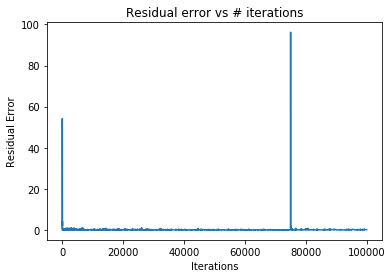

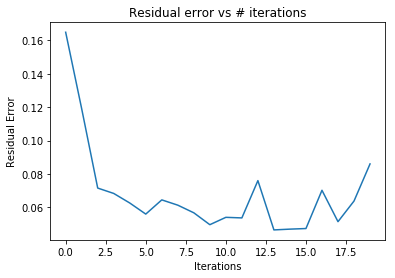

<Figure size 432x288 with 0 Axes>

In [41]:
x = range(100001)
plt.title('Residual error vs # iterations')
plt.xlabel('Iterations')
plt.ylabel('Residual Error')
plt.plot(x, e)  
plt.figure()

y_new = []
for i in range(0,100000, 5000):
    y_new.append(e[i])

x = range(len(y_new))
plt.title('Residual error vs # iterations')
plt.xlabel('Iterations')
plt.ylabel('Residual Error')
plt.plot(x, y_new)  
plt.figure()


<Figure size 432x288 with 0 Axes>

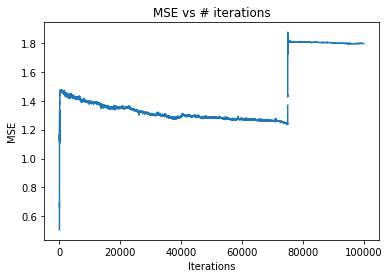

<Figure size 432x288 with 0 Axes>

In [42]:
x = range(100001)
plt.title('MSE vs # iterations')
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.plot(x, m)  
plt.figure()

In [2]:
# Set up
rank = 100
F = tl_rand.random_kruskal((300,300,300), rank, full=False, random_state=np.random.RandomState(seed=0))
X = tl_kruskal.kruskal_to_tensor(F)
alphas = [0.1, 0.05, 0.01]
B = 18
beta = 10**-6
num_iterations = 100

In [5]:
# Run bras_cpd update
alpha = 0.1
start = timer()
res_error = bras_CPD(F, X, rank, B, alpha, beta, num_iterations)
end = timer()



In [8]:
np.savetxt("fixed_rand_error_bras_0.txt", res_error)

<Figure size 432x288 with 0 Axes>

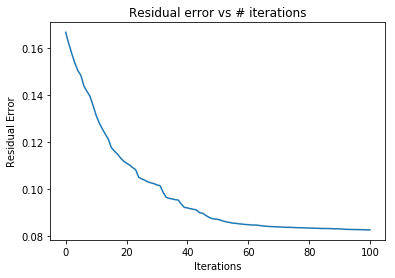

<Figure size 432x288 with 0 Axes>

In [9]:
l = np.loadtxt("fixed_rand_error_bras_0.txt")
x = range(len(l))
plt.title('Residual error vs # iterations')
plt.xlabel('Iterations')
plt.ylabel('Residual Error')
plt.plot(x, l)  
plt.figure()


In [25]:
import matplotlib.pyplot as plt
import tensorly.kruskal_tensor as tl_kruskal
import tensorly.random as tl_rand
import numpy as np
from timeit import default_timer as timer

from BLOCK_SPG_CPD import bras_CPD
from BLOCK_SPG_CPD import ada_CPD

for i in range(2):
    # Each entry of the factor matrix is uniformly sampled from (0,1) and kruskal_tensor is used to from X
    rank = 100
    F = tl_rand.random_kruskal((300,300,300), rank, full=False, random_state=np.random.RandomState(seed=i))
    X = tl_kruskal.kruskal_to_tensor(F)

    # Ill conditioned matrix

    # Hetero noise

    # Homo noise

    # Parameters
    B = 18
    eta = 1
    b = 10**-6
    eps = 0
    num_iterations = 1000

    # Run ada_cpd update
    time, res_error = ada_CPD(F, X, rank, B, eta, b, eps, num_iterations)

    # Save data
    s = "fixed_rand_error_ada_" + str(i) + ".txt"
    np.savetxt(s, res_error)
    print(time)

138.2760633999992
127.984394600001


<Figure size 432x288 with 0 Axes>

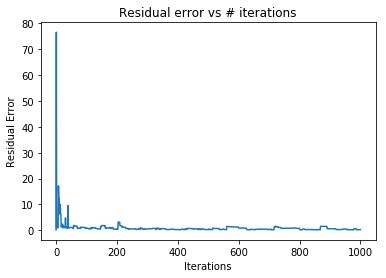

<Figure size 432x288 with 0 Axes>

In [26]:
l = np.loadtxt("fixed_rand_error_ada_0.txt")
x = range(len(l))
plt.title('Residual error vs # iterations')
plt.xlabel('Iterations')
plt.ylabel('Residual Error')
plt.plot(x, l)  
plt.figure()


<Figure size 432x288 with 0 Axes>

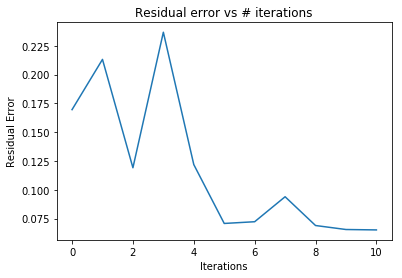

<Figure size 432x288 with 0 Axes>

In [29]:
l = np.loadtxt("fixed_rand_error_ada_1.txt")
new_l = []
for i in range(len(l)):
    if i % 100 == 0:
        new_l.append(l[i])

x = range(len(new_l))
plt.title('Residual error vs # iterations')
plt.xlabel('Iterations')
plt.ylabel('Residual Error')
plt.plot(x, new_l)  
plt.figure()
